# Analise Financeira com Python

In [39]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as web

from plotly.offline import plot, iplot
import plotly
import plotly.offline as py

import plotly.express as px
import plotly.graph_objects as go

from datetime import date
from datetime import datetime

In [2]:
# Lista de códigos de ações aleatórias para analise
lista = ['BBFI11B.sa','COGN3.sa','SPTW11.sa','OIBR3.sa','VVAR3.sa']


In [3]:
# criação de um DataFrame com os preços de fechamento ao longo do tempo da ações da lista   
dado = web.DataReader(lista,'yahoo')['Adj Close']
ibov = web.DataReader('^BVSP','yahoo')['Adj Close']

In [4]:
# Verificamos o começo e o fim do dataset
dado.head(-5)

Symbols      BBFI11B.sa   COGN3.sa  SPTW11.sa  OIBR3.sa   VVAR3.sa
Date                                                              
2016-05-06  2272.816895  10.713312  64.072884  0.611959   2.694746
2016-05-09  2164.587646  10.858699  65.058624  0.597033   2.684802
2016-05-10  2262.977783  11.331208  65.058624  0.604496   2.684802
2016-05-11  2234.552979  10.904132  65.058624  0.626885   2.804127
2016-05-12  2390.885254  11.158561  65.334625  0.619422   3.082551
...                 ...        ...        ...       ...        ...
2021-04-22  2460.010010   3.960000  62.500000  1.700000  12.630000
2021-04-23  2500.000000   3.960000  62.349998  1.770000  13.120000
2021-04-26  2504.729980   3.990000  63.169998  1.810000  12.850000
2021-04-27  2514.989990   3.960000  63.200001  1.740000  12.160000
2021-04-28  2512.000000   4.000000  62.860001  1.770000  12.220000

[1235 rows x 5 columns]

In [5]:
# Não temos valor Nan
dado.isna()

Symbols     BBFI11B.sa  COGN3.sa  SPTW11.sa  OIBR3.sa  VVAR3.sa
Date                                                           
2016-05-06       False     False      False     False     False
2016-05-09       False     False      False     False     False
2016-05-10       False     False      False     False     False
2016-05-11       False     False      False     False     False
2016-05-12       False     False      False     False     False
...                ...       ...        ...       ...       ...
2021-04-29       False     False      False     False     False
2021-04-30       False     False      False     False     False
2021-05-03       False     False      False     False     False
2021-05-04       False     False      False     False     False
2021-05-05       False     False      False     False     False

[1240 rows x 5 columns]

In [6]:
# Vamos normalizar os dados supondo que foi comprado 10000 cotas de casa ação
dado_normalizado = (dado/dado.iloc[0])*10000
dado_normalizado.head(-5)

Symbols       BBFI11B.sa      COGN3.sa     SPTW11.sa      OIBR3.sa  \
Date                                                                 
2016-05-06  10000.000000  10000.000000  10000.000000  10000.000000   
2016-05-09   9523.810086  10135.706581  10153.846777   9756.095470   
2016-05-10   9956.709617  10576.755416  10153.846777   9878.047735   
2016-05-11   9831.645408  10178.114609  10153.846777  10243.905504   
2016-05-12  10519.480296  10415.603128  10196.922874  10121.953239   
...                  ...           ...           ...           ...   
2021-04-22  10823.617229   3696.335907   9754.516495  27779.640494   
2021-04-23  10999.566248   3696.335907   9731.105417  28923.506920   
2021-04-26  11020.377341   3724.338425   9859.084626  29577.144879   
2021-04-27  11065.519604   3696.335907   9863.767199  28433.278452   
2021-04-28  11052.364166   3733.672598   9810.702605  28923.506920   

Symbols         VVAR3.sa  
Date                      
2016-05-06  10000.000000  
2016-05-09   9963.099589  
2016-05-10   9963.099589  
2016-05-11  10405.903641  
2016-05-12  11439.115162  
...                  ...  
2021-04-22  46868.981465  
2021-04-23  48687.333799  
2021-04-26  47685.385926  
2021-04-27  45124.845787  
2021-04-28  45347.502837  

[1235 rows x 5 columns]

In [7]:
# Vamos criar uma coluna com o saldo de cada dia
dado_normalizado['saldo'] = dado_normalizado.sum(axis=1)
dado_normalizado

Symbols       BBFI11B.sa      COGN3.sa     SPTW11.sa      OIBR3.sa  \
Date                                                                 
2016-05-06  10000.000000  10000.000000  10000.000000  10000.000000   
2016-05-09   9523.810086  10135.706581  10153.846777   9756.095470   
2016-05-10   9956.709617  10576.755416  10153.846777   9878.047735   
2016-05-11   9831.645408  10178.114609  10153.846777  10243.905504   
2016-05-12  10519.480296  10415.603128  10196.922874  10121.953239   
...                  ...           ...           ...           ...   
2021-04-29  11052.364166   3668.333389   9724.862979  28596.687941   
2021-04-30  11083.162951   3612.328131   9674.919902  27779.640494   
2021-05-03  10946.724288   3602.993959   9389.307373  28433.278452   
2021-05-04  10968.767462   3518.986405   9350.289307  27779.640494   
2021-05-05  10908.929392   3621.662526   9317.514275  28106.459473   

Symbols         VVAR3.sa         saldo  
Date                                    
2016-05-06  10000.000000  50000.000000  
2016-05-09   9963.099589  49532.558503  
2016-05-10   9963.099589  50528.459133  
2016-05-11  10405.903641  50813.415939  
2016-05-12  11439.115162  52693.074698  
...                  ...           ...  
2021-04-29  44902.192277  97944.440753  
2021-04-30  43900.240865  96050.292343  
2021-05-03  44048.677718  96420.981791  
2021-05-04  44308.441326  95926.124995  
2021-05-05  44902.192277  96856.757944  

[1240 rows x 6 columns]

In [19]:
# Normalização dos dados do ibovespa
ibov_normalizado = (ibov/ibov[0])*50000

<AxesSubplot:xlabel='Date'>

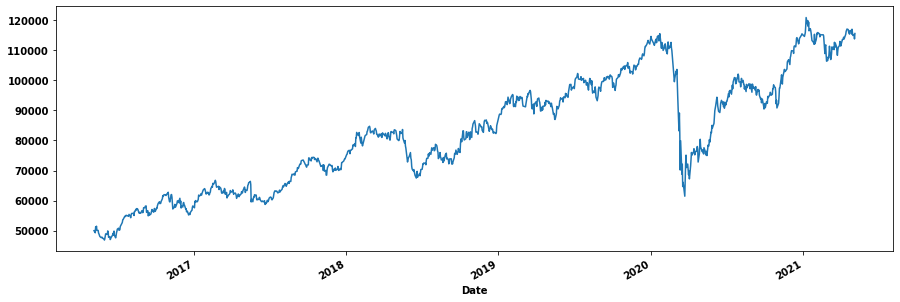

In [20]:
ibov_normalizado.plot(figsize=(15,5) ,label='Ibov')

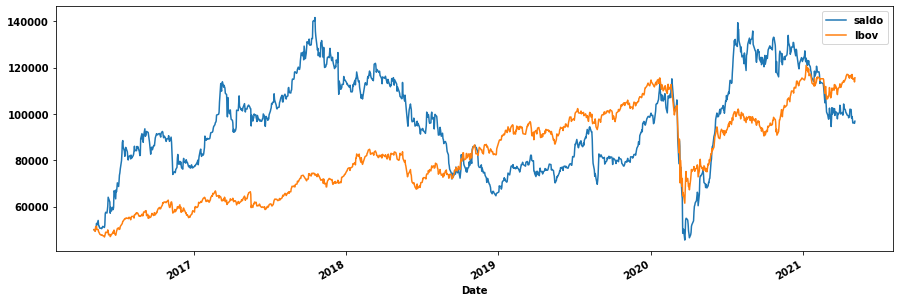

In [21]:
# Vamos observar o comportamento do saldo em carteira e o Ibovespa
dado_normalizado.iloc[:,-1].plot(figsize=(15,5))
ibov_normalizado.plot(label='Ibov')
plt.legend()

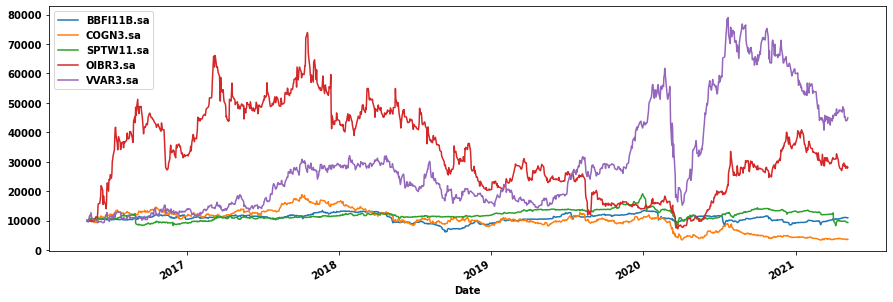

In [22]:
# Vamos verificar o comportamento de cada ação no espaço de tempo estudado, através do gráfico abaixo
dado_normalizado.iloc[:,:-1].plot(figsize=(15,5))
plt.legend(loc="upper left")

#### Gráfico de comparação do Ibovespa com as linhas de preço de fechamento, média movel de um semana e de um mês


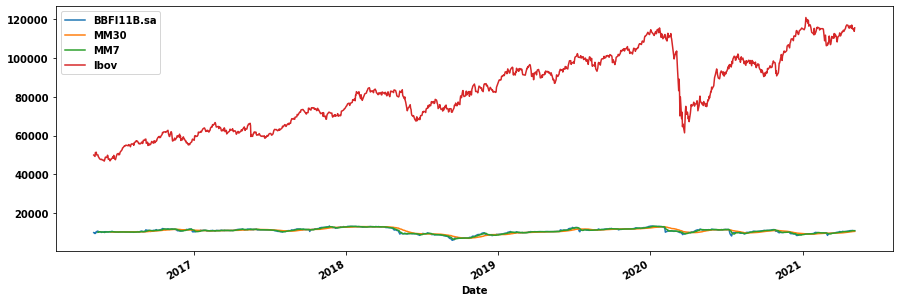

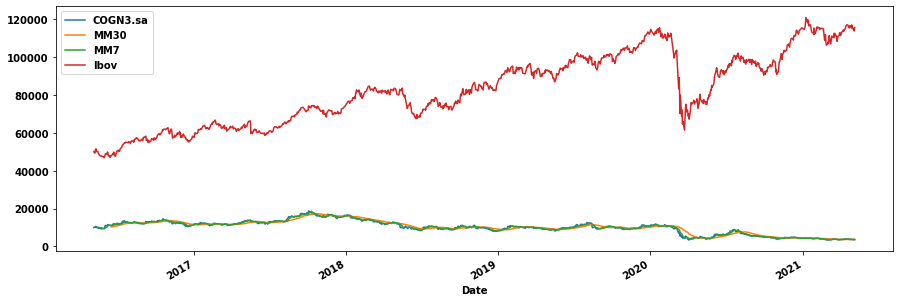

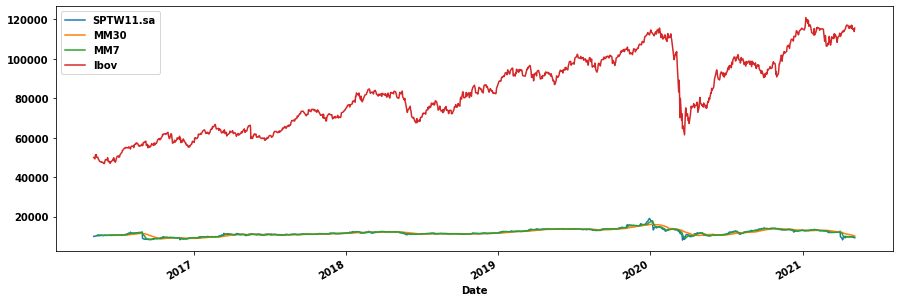

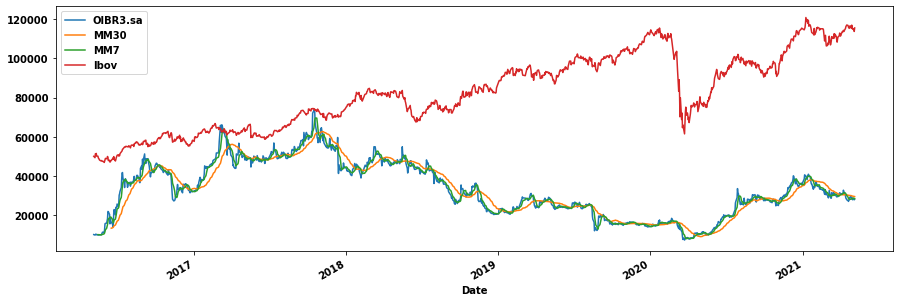

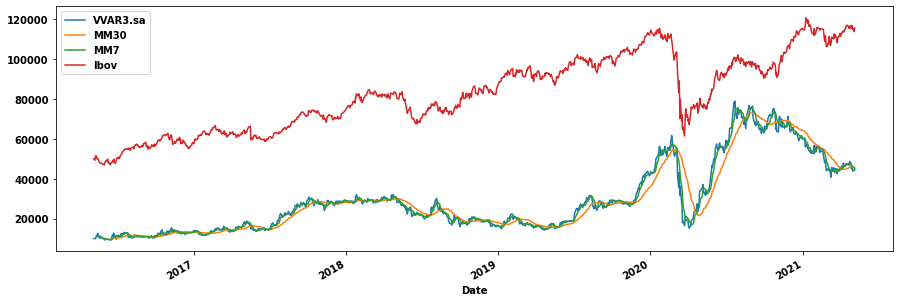

In [31]:
for i in range(0, (len(dado_normalizado.columns)-1)):
    df = dado_normalizado.iloc[:,i]
    df.plot(figsize = (15,5), label=dado_normalizado.columns[i])
    df.rolling(30).mean().plot(label='MM30') # Média movel mensal
    df.rolling(7).mean().plot(label='MM7') # Média móvel semanal
    ibov_normalizado.plot(label='Ibov')
    plt.legend()
    plt.show()

#### Usando a biblioteca plotly podemos aproximar qualquer área do gráfico que nos interesse e ainda podemos fazer um dowload da imagem no ícone de fotografia ao passarmos o mouse acima de cada gráfico

In [13]:
dado_candle = {}
for i in range(0, len(lista)):
    dado_info = web.DataReader(lista[i],'yahoo')
    dado_candle[lista[i]] = dado_info

In [14]:
for i in range(0, len(lista)):
    i=0
    nome = lista[i]
    df = dado_candle[nome]
    trace = go.Candlestick(x = df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'])
    data = [trace]
    nome = nome
    fig = go.Figure(data=data)
    fig.update_layout(
    title={'text': nome})
    fig.show()

#### Calculo do retorno sobre cada investimento 

<AxesSubplot:xlabel='Date'>

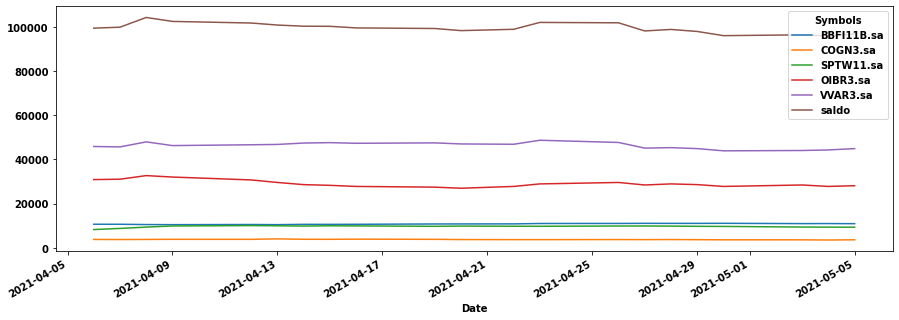

In [44]:
carteira_60 = dado_normalizado.iloc[-21:,:]

carteira_60.plot(figsize = (15,5))

In [46]:
# Calculo retorno
df = carteira_60.copy()  # fazer uma cópia 
df = df.reset_index()  #tirar a data do index


In [47]:
# Extrair colunas em lista
colunas = df.columns
colunas = list(colunas[1:])

In [48]:
# Criar DataFrame para Rentabilidade
df_rent = df[['Date']]
n = len(df_rent) # usar um período de tempo de maneira dinâmica de acordo com o que eu selecionei

In [49]:
for coluna in colunas:
    data = []
    for idx,val in df.iterrows():
        if idx>0:
            r = math.log(df.loc[idx,coluna] / df.loc[idx-1,coluna])
            data.append(r)
     
    df_rent[coluna] = data
    
df_rent    

ValueError: Length of values (20) does not match length of index (21)

In [17]:
i=0
dado_candle[lista[i]].iloc[-1]/dado_candle[lista[i]].iloc[-1]

High         1.0
Low          1.0
Open         1.0
Close        1.0
Volume       1.0
Adj Close    1.0
Name: 2021-05-05 00:00:00, dtype: float64

In [18]:
for i in range(0, len(lista)):
    i=0
    nome = lista[i]
    df = dado_candle[nome]
    retorno_code = (df.iloc[-1]/df.iloc[i]-1)
    
    start = date.isoformat(df.index[0])
    end = date.isoformat(df.index[-1])
#     tempo = abs((end - start).days)
    print("{} Retorno de {} no período de {} até {}".format(nome, retorno_code, start, end ))
#     print('{} tempo de investimento'.format(tempo))
    
#     print('\n')

BBFI11B.sa Retorno de High         0.072492
Low          0.065217
Open         0.063921
Close        0.073333
Volume       2.486486
Adj Close    0.090893
dtype: float64 no período de 2016-05-06 até 2021-05-05
BBFI11B.sa Retorno de High         0.072492
Low          0.065217
Open         0.063921
Close        0.073333
Volume       2.486486
Adj Close    0.090893
dtype: float64 no período de 2016-05-06 até 2021-05-05
BBFI11B.sa Retorno de High         0.072492
Low          0.065217
Open         0.063921
Close        0.073333
Volume       2.486486
Adj Close    0.090893
dtype: float64 no período de 2016-05-06 até 2021-05-05
BBFI11B.sa Retorno de High         0.072492
Low          0.065217
Open         0.063921
Close        0.073333
Volume       2.486486
Adj Close    0.090893
dtype: float64 no período de 2016-05-06 até 2021-05-05
BBFI11B.sa Retorno de High         0.072492
Low          0.065217
Open         0.063921
Close        0.073333
Volume       2.486486
Adj Close    0.090893
dtype: flo